# 1-a. Load Data + Basic Imports

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e2/sample_submission.csv
/kaggle/input/playground-series-s5e2/train.csv
/kaggle/input/playground-series-s5e2/test.csv
/kaggle/input/playground-series-s5e2/training_extra.csv


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('/kaggle/input/playground-series-s5e2/train.csv')
train_extra_df = pd.read_csv('/kaggle/input/playground-series-s5e2/training_extra.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s5e2/test.csv')

# 1-b. Initial Analysis of Data Types + Distributions

In [4]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB
None


In [5]:
#train_df.head(15)
#train_df.tail(15)
train_df.describe()

,id,Compartments,Weight Capacity (kg),Price
count,300000.000000,300000.000000,299862.000000,300000.000000
mean,149999.500000,5.443590,18.029994,81.411107
std,86602.684716,2.890766,6.966914,39.039340
min,0.000000,1.000000,5.000000,15.000000
25%,74999.750000,3.000000,12.097867,47.384620
50%,149999.500000,5.000000,18.068614,80.956120
75%,224999.250000,8.000000,24.002375,115.018160
max,299999.000000,10.000000,30.000000,150.000000


In [6]:
#Total Counts of Missing Data
pd.DataFrame(train_df.isnull().sum())

,0
id,0
Brand,9705
Material,8347
Size,6595
Compartments,0
Laptop Compartment,7444
Waterproof,7050
Style,7970
Color,9950
Weight Capacity (kg),138


In [49]:
#Creating a quick function for Categorical Data Distribution viewing
def cat_quick_plot(df, name):
    plt.clf()
    fig, axes = plt.subplots(1,2,figsize=(15, 4))
    axes = axes.flatten()
    
    value_counts = df[name].value_counts().reset_index()
    value_counts.columns = [name, 'Frequency']
    
    sns.barplot(value_counts, x=name, y='Frequency', ax = axes[0])
    axes[0].set_title(f'{name} Frequencies', fontweight='bold')
    axes[0].set_xlabel(f'{name}', fontweight='bold')
    axes[0].set_ylabel('Frequency', fontweight='bold')
    
    sns.boxplot(train_df, x=name, y='Price', ax=axes[1])
    axes[1].set_title(f'{name} Price Distributions', fontweight='bold')
    axes[1].set_xlabel(f'{name}', fontweight='bold')
    axes[1].set_ylabel('Price', fontweight='bold')
    plt.show()

<Figure size 640x480 with 0 Axes>

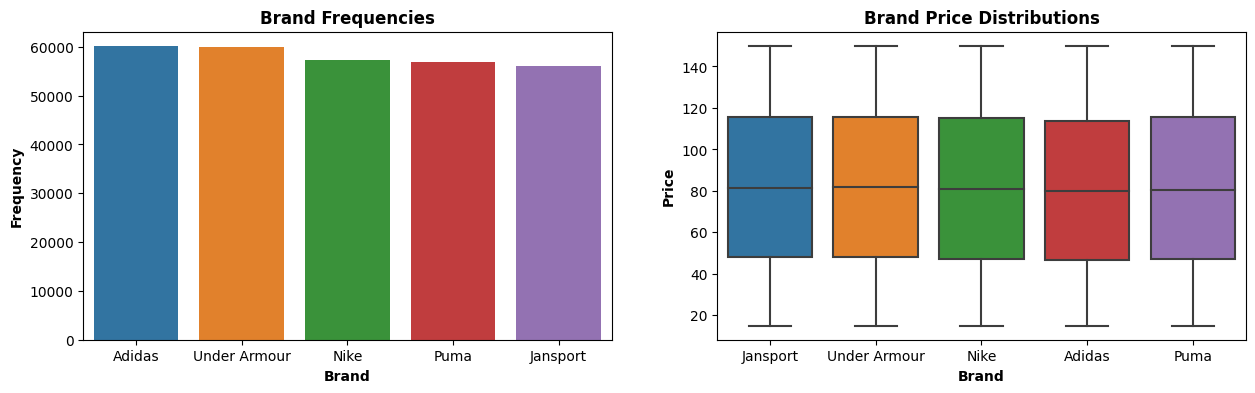

In [50]:
#Plots for Brand Data
cat_quick_plot(train_df, 'Brand')


<Figure size 640x480 with 0 Axes>

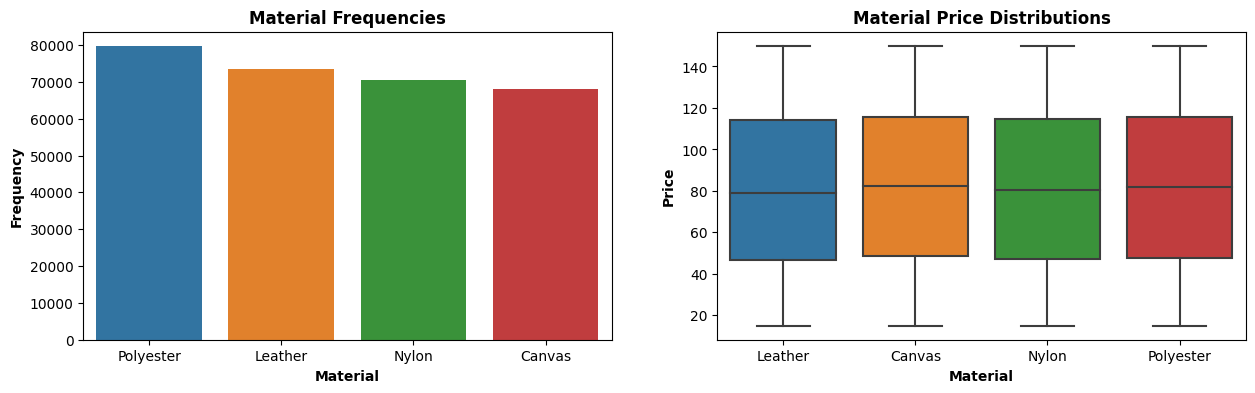

In [51]:
#Plots for Material Data
cat_quick_plot(train_df, 'Material')

<Figure size 640x480 with 0 Axes>

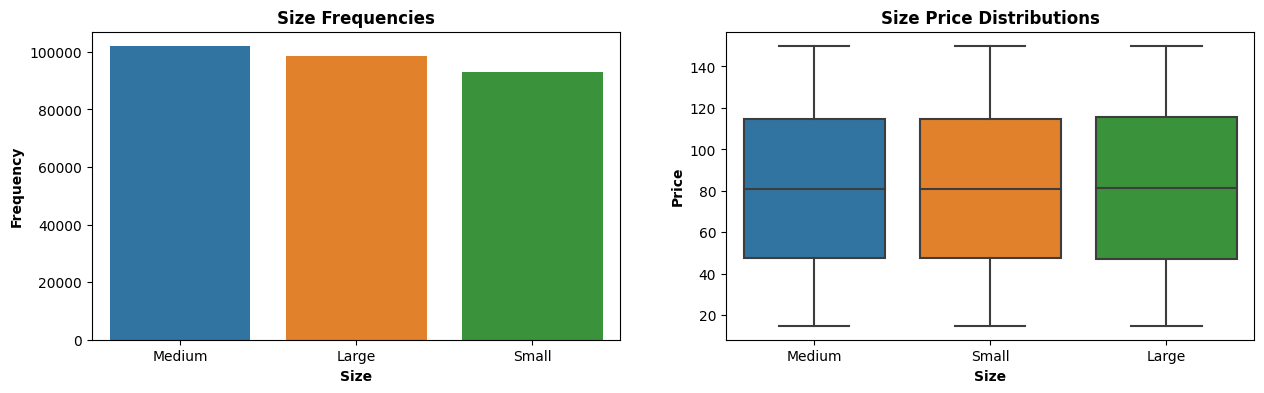

In [52]:
#Plots for Size Data
cat_quick_plot(train_df, 'Size')

<Figure size 640x480 with 0 Axes>

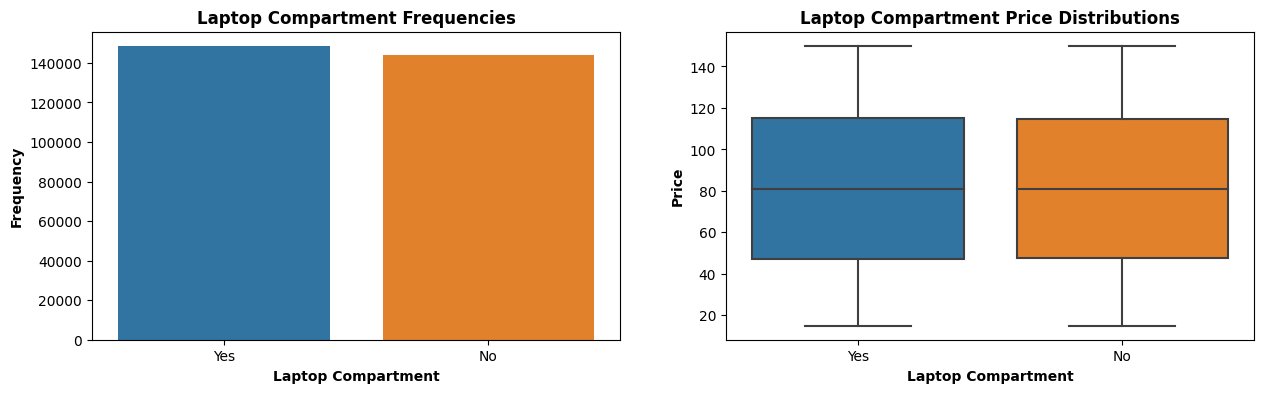

In [53]:
#Plots for Laptop Compartment Data
cat_quick_plot(train_df, 'Laptop Compartment')

<Figure size 640x480 with 0 Axes>

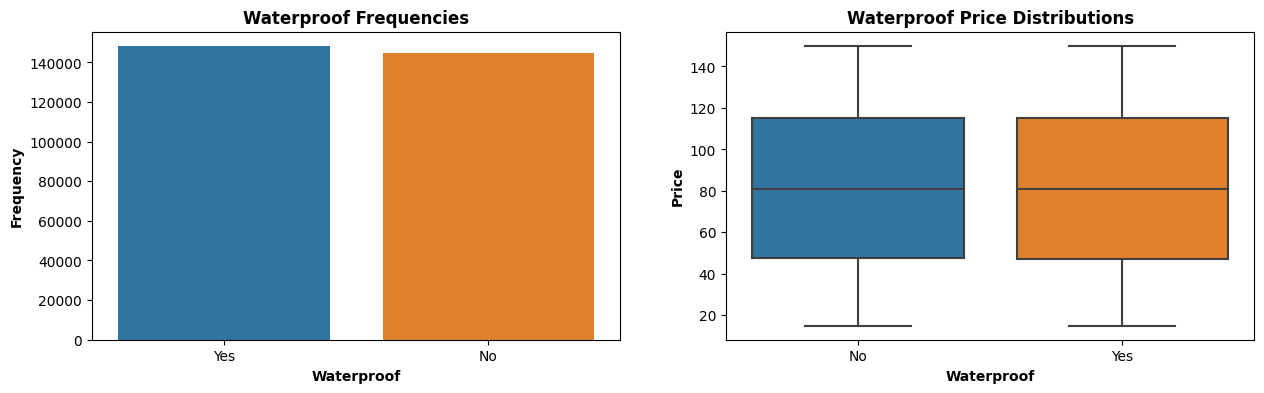

In [54]:
#Plots for Waterproof Data
cat_quick_plot(train_df, 'Waterproof')

<Figure size 640x480 with 0 Axes>

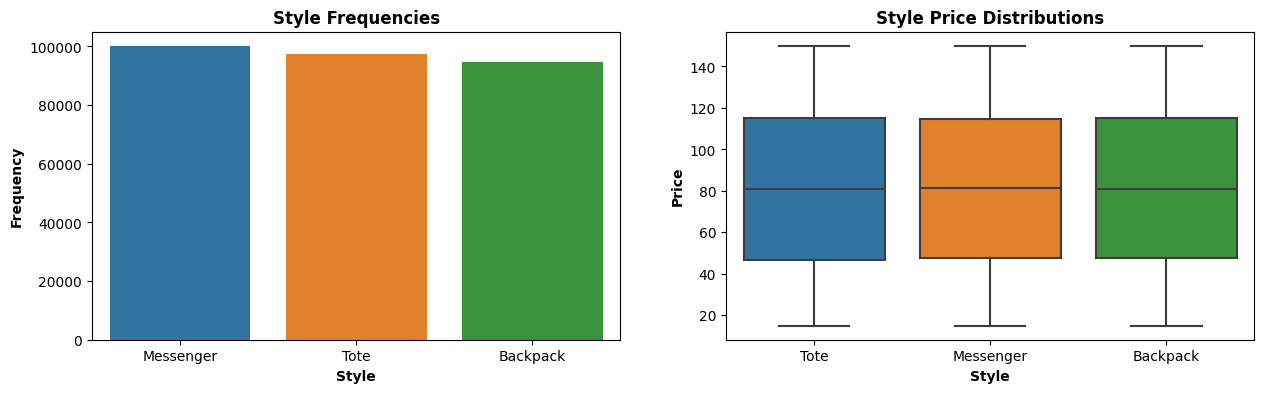

In [55]:
#Plots for Style Data
cat_quick_plot(train_df, 'Style')

<Figure size 640x480 with 0 Axes>

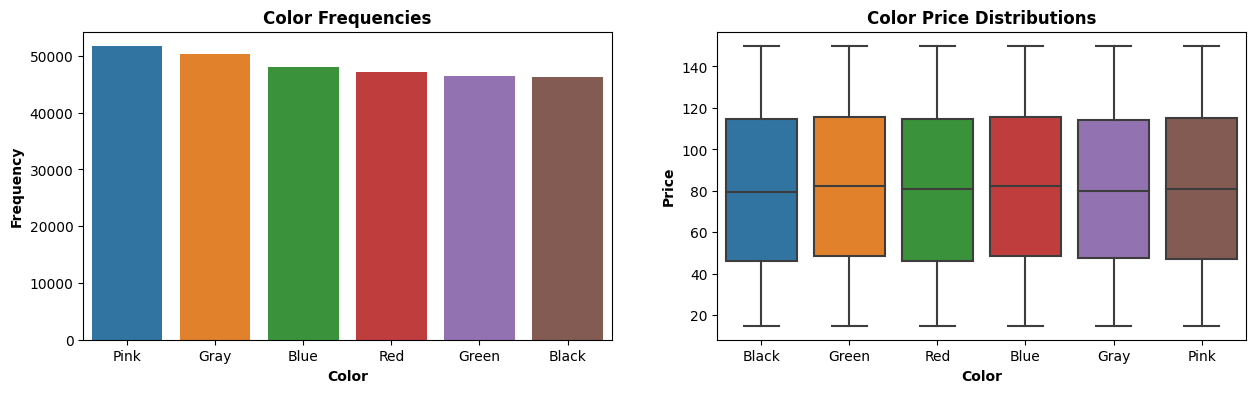

In [56]:
#Plots for Color Data
cat_quick_plot(train_df, 'Color')

<Figure size 640x480 with 0 Axes>

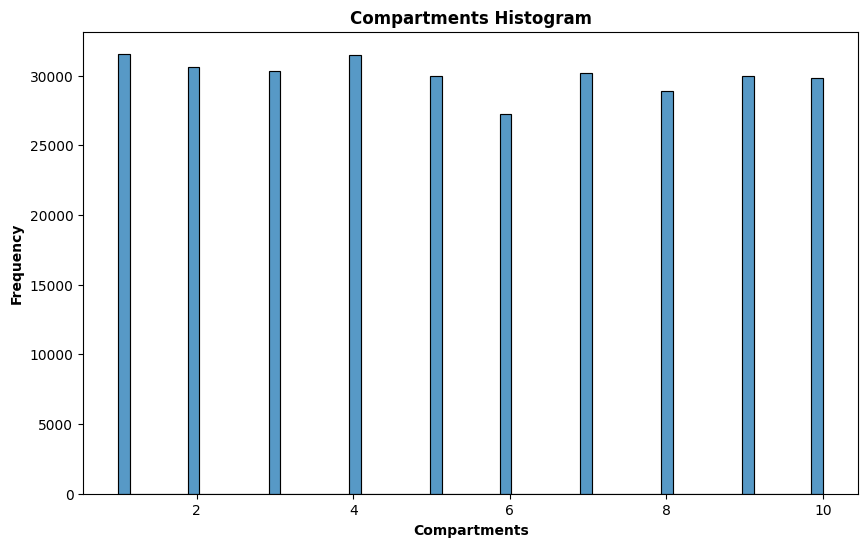

In [46]:
#Compartments Graphing attempt 1
# plt.clf()
# fig, axes = plt.subplots(1,1,figsize=(10,6))

# sns.stripplot(data=train_df, x='Compartments', y='Price', ax=axes, jitter=True, alpha=.7)
# axes.set_title('Compartments vs Price Scatterplot', fontweight='bold')
# axes.set_xlabel('Compartments', fontweight='bold')
# axes.set_ylabel('Price', fontweight='bold')
# plt.show()

#Compartments Graphing attempt 2
plt.clf()
fig, axes = plt.subplots(1,1,figsize=(10,6))

sns.histplot(data=train_df, x='Compartments', ax=axes, stat='count')
axes.set_title('Compartments Histogram', fontweight='bold')
axes.set_xlabel('Compartments', fontweight='bold')
axes.set_ylabel('Frequency', fontweight='bold')
plt.show()

<Figure size 640x480 with 0 Axes>

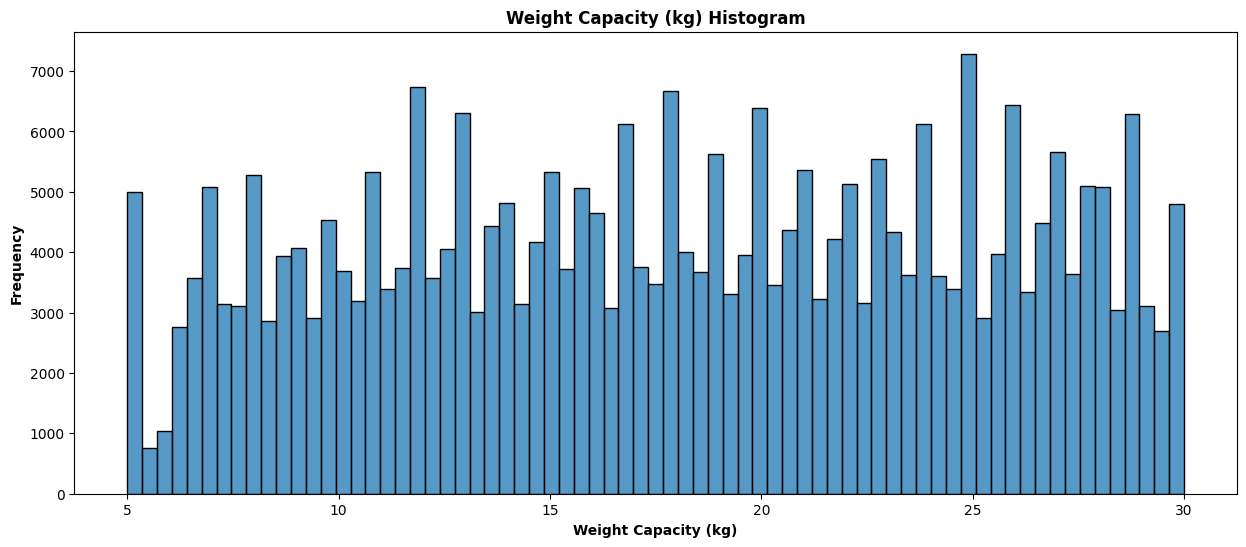

In [43]:
#Weight Capacity (kg) Graphing attempt 1 (Warning: Kaggle froze while computing this chart)
# plt.clf()
# fig, axes = plt.subplots(1,1,figsize=(10,6))

# sns.stripplot(data=train_df, x='Weight Capacity (kg)', y='Price', ax=axes, jitter=True, alpha=.7)
# axes.set_title('Weight Capacity (kg) vs Price Scatterplot', fontweight='bold')
# axes.set_xlabel('Weight Capacity (kg)', fontweight='bold')
# axes.set_ylabel('Price', fontweight='bold')
# plt.show()

#Weight Capacity (kg) Graphing attempt 2
plt.clf()
fig, axes = plt.subplots(1,1,figsize=(15,6))

sns.histplot(data=train_df, x='Weight Capacity (kg)', ax=axes, stat='count')
axes.set_title('Weight Capacity (kg) Histogram', fontweight='bold')
axes.set_xlabel('Weight Capacity (kg)', fontweight='bold')
axes.set_ylabel('Frequency', fontweight='bold')
plt.show()

<Figure size 640x480 with 0 Axes>

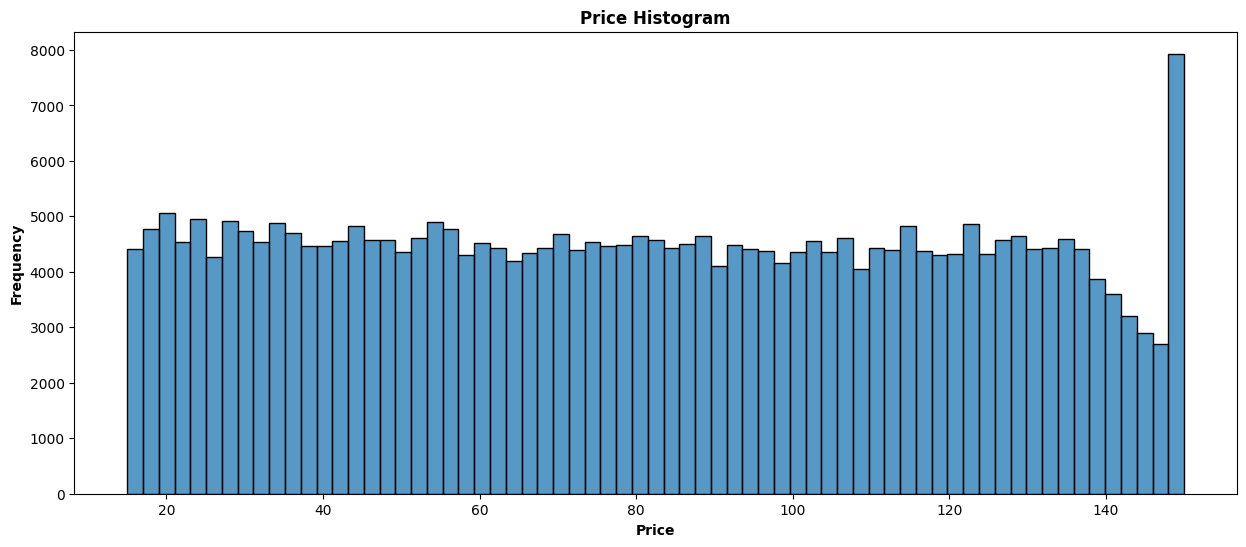

In [48]:
#Price Histrogram quick look
plt.clf()
fig, axes = plt.subplots(1,1,figsize=(15,6))

sns.histplot(data=train_df, x='Price', ax=axes, stat='count')
axes.set_title('Price Histogram', fontweight='bold')
axes.set_xlabel('Price', fontweight='bold')
axes.set_ylabel('Frequency', fontweight='bold')
plt.show()

In [64]:
train_df[train_df.isna().any(axis=1)].shape
#Finding: 57,199 entries are distributed across 53,314 rows (only 7% overlap in NaN fields)... recommend to not drop rows due to limited overlap

(53314, 11)